# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data Pre-processing

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3: -1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h6>Encoding categorical data</h6>

Label Encoding the "Gender" column

In [5]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [6]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

<h6>Splitting the dataset into the Training set and Test set</h6>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h6>Feature Scaling</h6>

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Model

<h6>Initialising the ANN</h6>

In [9]:
classifier = Sequential()

<h6>Adding the input layer and the first hidden layer</h6>

In [10]:
classifier.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

<h6>Adding the second hidden layer</h6>

In [11]:
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

<h6>Adding the output layer</h6>

In [12]:
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Training of the ANN

<h6>Compiling the ANN (Configuring the learning process)</h6>

In [13]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<h6>Fitting the ANN to the Training set</h6>

In [14]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4830 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4290 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4240 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4196 - accuracy: 0.8183
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4174 - accuracy: 0.8251
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4154 - accuracy: 0.8280
Epoch 7/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4140 - accuracy: 0.8291
Epoch 8/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4122 - accuracy: 0.8322
Epoch 9/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4111 - accuracy: 0.8321
Epoch 10/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4097 - accura

800/800 [==============================] - 3s 3ms/step - loss: 0.3998 - accuracy: 0.8338
Epoch 82/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8360
Epoch 83/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4003 - accuracy: 0.8349
Epoch 84/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4001 - accuracy: 0.8357
Epoch 85/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3999 - accuracy: 0.8354
Epoch 86/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4004 - accuracy: 0.8355
Epoch 87/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4000 - accuracy: 0.8339
Epoch 88/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3999 - accuracy: 0.8357
Epoch 89/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4003 - accuracy: 0.8329
Epoch 90/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 

# Making the predictions and Evaluating the model

<h6>Predicting the Test set results</h6>

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


<h6>Making the Confusion Matrix</h6>

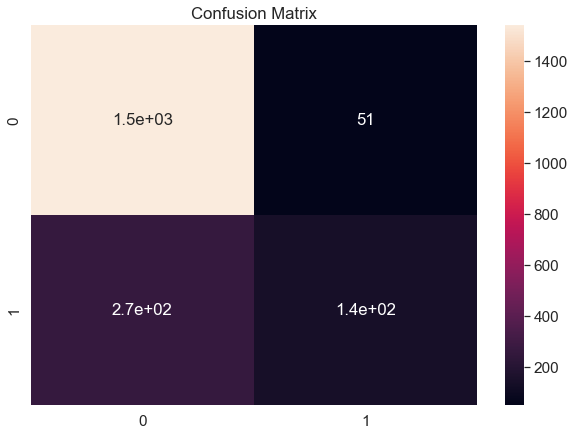

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()